# Introduction 
# Stock Forecasting using PyAF (Python Automatic Forecasting) 

https://github.com/antoinecarme/pyaf

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyaf.ForecastEngine as autof

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Date
2017-01-03    11.43
2017-01-04    11.43
2017-01-05    11.24
2017-01-06    11.32
2017-01-09    11.49
Name: Adj Close, dtype: float64

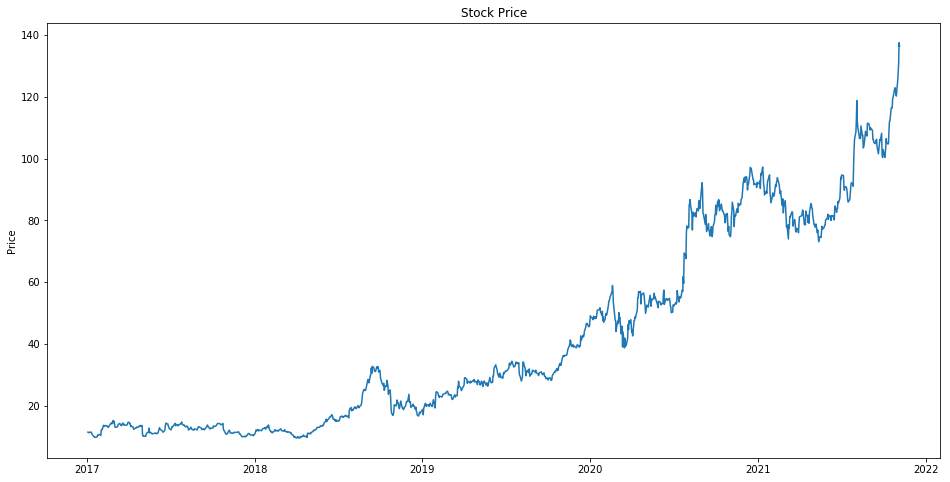

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df)
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [5]:
df = df.reset_index()
df.tail()

,Date,Adj Close
1216,2021-11-01,125.230003
1217,2021-11-02,127.629997
1218,2021-11-03,130.529999
1219,2021-11-04,137.500000
1220,2021-11-05,136.339996


In [6]:
lEngine = autof.cForecastEngine()
lEngine.train(df , 'Date' , 'Adj Close', 7);

INFO:pyaf.std:START_TRAINING 'Adj Close'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Adj Close']' 4.623751163482666


In [7]:
df_forecast = lEngine.forecast(df, 7)



INFO:pyaf.std:START_FORECASTING '['Adj Close']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Adj Close']' 0.10168004035949707


In [8]:
df_forecast[['Date' , 'Adj Close' , 'Adj Close_Forecast']].tail(7)


,Date,Adj Close,Adj Close_Forecast
1221,2021-11-06,NaN,136.339996
1222,2021-11-07,NaN,136.339996
1223,2021-11-08,NaN,136.339996
1224,2021-11-09,NaN,136.339996
1225,2021-11-10,NaN,136.339996
1226,2021-11-11,NaN,136.339996
1227,2021-11-12,NaN,136.339996


In [9]:
lEngine.getModelInfo()


INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2017-01-03T00:00:00.000000 TimeMax=2020-11-09T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Adj Close' Length=1221  Min=9.529999732971191 Max=137.5  Mean=42.16723996005422 StdDev=31.905376318970223
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Adj Close' Min=9.529999732971191 Max=137.5  Mean=42.16723996005422 StdDev=31.905376318970223
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [Lag1Trend + Cycle_None + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Adj Close_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE' [Cycle_None]
INFO:pyaf.std:AUTOREG_DETAIL '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.026 MAPE_Forecast=0.0179 MAPE_Test=0.0224
INFO:pyaf.std:MODEL_SMAPE SMAPE

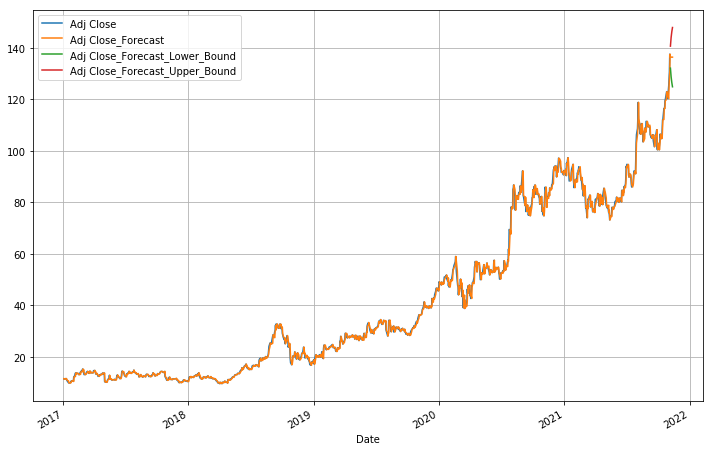

In [10]:
df_forecast.plot.line('Date', ['Adj Close' , 'Adj Close_Forecast', 
                                             'Adj Close_Forecast_Lower_Bound', 
                                             'Adj Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))